# Authentication

In [1]:
import praw

user_agent = "Reddit_Scrapper 1.0 by /u/FeatureChoice5036"
reddit = praw.Reddit(
    client_id="7lsJxROv7r2IQEfiAsqf2Q",
    client_secret="5ye7Q30c7b5hvxbID8vfKg9985HUBQ",
    user_agent=user_agent
)

In [2]:
import pandas as pd
import numpy as np
import re #RegEx : Regular expression

## Get Trending Topic from your Subreddit
### The "Openai" subreddit channel will be use for this project

In [8]:
# Hot new rising topics

headlines = set()
for submission in reddit.subreddit("openai").hot(limit=None):
    print(submission.title)#Subreddit Title
    print(submission.id) #ID
    print(submission.author) #Author of the subreddit
    print(submission.created_utc) #Date and time being created
    print(submission.score) # Average Score
    print(submission.upvote_ratio) # Upvote ratio
    print(submission.url) # Like to the Subreddit
    break
    headlines.add(submission.title)
print(len(headlines))

Just released: Sora first use outside of OpenAI
1bnjnbd
Butterscotch_Crazy
1711388186.0
734
0.98
https://openai.com/blog/sora-first-impressions
0


### Get total Headlines in Subreddit

In [9]:
headlines = set()
for submission in reddit.subreddit("openai").hot(limit=None): # Iterate through the hot posts in the "openai" subreddit
    headlines.add(submission.title) # Add each submission's title to the set of headlines
print(len(headlines)) # Print the number of unique headlines fetched

514


In [10]:
#Create a dataframe from the scrapped data 
df = pd.DataFrame(headlines)
df.head() # Display the first few rows of the DataFrame

,0
0,Chatgpt no login option stuck on 3.5. No acces...
1,Did anyone using Microsoft for Startup credit ...
2,"New Paper Reveals Major Exploit in GPT4, Claude"
3,How do you see the world in 5 years? Consideri...
4,Open AI to interpret buy and sell signals


In [11]:
df.columns

RangeIndex(start=0, stop=1, step=1)

In [12]:
df.columns = ['Titles']

In [13]:
df.head()

,Titles
0,Chatgpt no login option stuck on 3.5. No acces...
1,Did anyone using Microsoft for Startup credit ...
2,"New Paper Reveals Major Exploit in GPT4, Claude"
3,How do you see the world in 5 years? Consideri...
4,Open AI to interpret buy and sell signals


In [14]:
df.Titles.duplicated().sum() # Check for duplicated titles in the 'Headline' column and count them

0

In [15]:
#Clean the text

#Create a function to clean the tweets
def cleanTxt(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text) #Remove @mentions replace with blank
    text = re.sub(r'#', '', text) #Remove the '#' symbol, replace with blank
    text = re.sub(r'RT[\s]+', '', text) #Removing RT, replace with blank
    text = re.sub(r'https?:\/\/\S+', '', text) #Remove the hyperlinks
    text = re.sub(r':', '', text) # Remove colons and replace with blank
    
    return text

#Cleaning the text
df["Titles"]= df["Titles"].apply(cleanTxt)

#Show the clean text
df.head()

,Titles
0,Chatgpt no login option stuck on 3.5. No acces...
1,Did anyone using Microsoft for Startup credit ...
2,"New Paper Reveals Major Exploit in GPT4, Claude"
3,How do you see the world in 5 years? Consideri...
4,Open AI to interpret buy and sell signals


In [16]:
#Next we have to remove emoji & Unicode from the reddit data.
def remove_emoji(string):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

#Cleaning the text
df["Titles"]= df["Titles"].apply(remove_emoji)

#Show the clean text
df.head()

,Titles
0,Chatgpt no login option stuck on 3.5. No acces...
1,Did anyone using Microsoft for Startup credit ...
2,"New Paper Reveals Major Exploit in GPT4, Claude"
3,How do you see the world in 5 years? Consideri...
4,Open AI to interpret buy and sell signals


In [17]:
from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS

In [18]:
#Create a function to get the subjectivity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

#Create a function to get Polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

#Now we create a new column for what we just did and add it to the Tweet_df dataframe
df['Subjectivity'] = df['Titles'].apply(getSubjectivity)
df['Polarity'] = df['Titles'].apply(getPolarity)

#Now display data
df.head()

,Titles,Subjectivity,Polarity
0,Chatgpt no login option stuck on 3.5. No acces...,0.000000,0.000000
1,Did anyone using Microsoft for Startup credit ...,0.000000,0.000000
2,"New Paper Reveals Major Exploit in GPT4, Claude",0.477273,0.099432
3,How do you see the world in 5 years? Consideri...,0.000000,0.000000
4,Open AI to interpret buy and sell signals,0.500000,0.000000


In [19]:
#Group the range of Polarity to different categories
def getInsight(score):
    if score < 0:
        return "Negative"
    elif score == 0:
        return "Neutral"
    else:
        return "Positive"
    
df["Insight"] = df["Polarity"].apply(getInsight)

df.head(50)

,Titles,Subjectivity,Polarity,Insight
0,Chatgpt no login option stuck on 3.5. No acces...,0.000000,0.000000,Neutral
1,Did anyone using Microsoft for Startup credit ...,0.000000,0.000000,Neutral
2,"New Paper Reveals Major Exploit in GPT4, Claude",0.477273,0.099432,Positive
3,How do you see the world in 5 years? Consideri...,0.000000,0.000000,Neutral
4,Open AI to interpret buy and sell signals,0.500000,0.000000,Neutral
5,Do people really support Open AI,0.350000,0.100000,Positive
6,Google engineer steals AI secrets,0.000000,0.000000,Neutral
7,AGI may never align with human needs — so says...,0.100000,0.000000,Neutral
8,Which AI is best for a medical student?,0.150000,0.500000,Positive
9,Geoffrey Hinton makes a “reasonable” projectio...,0.600000,0.200000,Positive


## Data Visualization

In [20]:
import seaborn as sns
import warnings
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

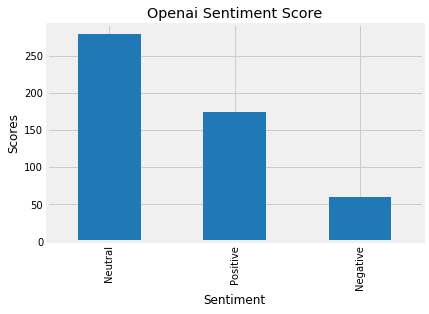

In [21]:
#Plot the values count of sentiment
plt.title("Openai Sentiment Score")
# Set labels for the x and y axes
plt.xlabel("Sentiment")
plt.ylabel("Scores")
# Set the size of the plot
plt.rcParams["figure.figsize"] = (10,8)
df["Insight"].value_counts().plot(kind="bar", color="#2078B4")
plt.show()

## Wordcloud

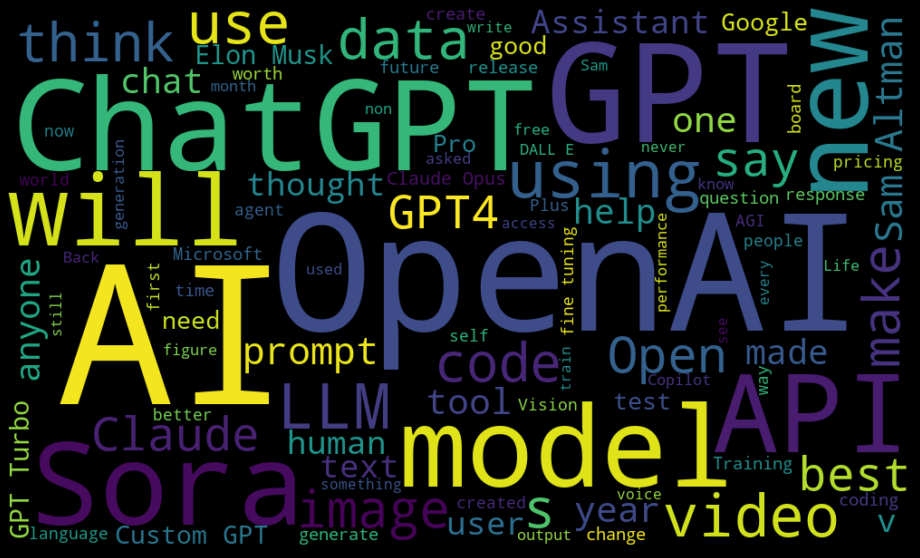

In [22]:
text = ' '.join( [twts for twts in df['Titles']] ) #To join all tweet
    # generate word cloud 
wordcloud = WordCloud(width=1000, height = 600,
                      
                      max_words = 100,
                      stopwords = STOPWORDS,
                      background_color="black").generate(text)

  # Display the generated image:
plt.figure( figsize=(20,10), facecolor='k' ) # Set the size and background color of the plot
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off");